In [1]:
# https://www.kaggle.com/vaishvik25/titanic-eda-fe-3-model-decision-tree-viz

In [2]:
import numpy as np 
import pandas as pd 
import sys
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="dark") #white background style for seaborn plots
sns.set(style="darkgrid", color_codes=True)
RED   = "\033[1;31m"  
BLUE  = "\033[1;34m"
CYAN  = "\033[1;36m"
GREEN = "\033[0;32m"
#sklearn imports source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [3]:
# get titanic & test csv files as a DataFrame

#developmental data (train)
titanic_df = pd.read_csv("train.csv")
#hold-out testing
test_df    = pd.read_csv("test.csv")
# preview developmental data
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Data Quality & Missing Value Assessment 
2.1 Age - Missing Values

Count of missing Values : 177 , The Proportion of this values with dataset is 19.869999999999997

visualization AGE


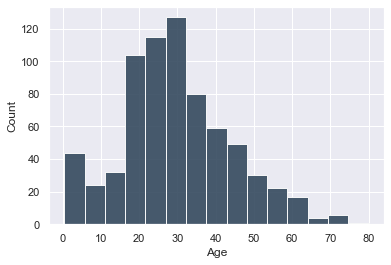

In [4]:
a=sum(pd.isnull(titanic_df['Age'])) # COUNT Missing Values in age
b=round(a/(len(titanic_df["PassengerId"])),4) # proportion of "Age" missing in percent
sys.stdout.write(GREEN)
print("Count of missing Values : {} , The Proportion of this values with dataset is {}\n".format(a,b*100))
sys.stdout.write(RED)
print("visualization AGE")
ax = titanic_df["Age"].hist(bins=15, color='#34495e', alpha=0.9)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [5]:
m1=titanic_df["Age"].median(skipna=True)  # Exclure les valeurs NaN (skipna = True) ou inclure les valeurs NaN (skipna = False)
m2=titanic_df["Age"].mean(skipna=True)
sys.stdout.write(RED)
print("Median: {} and Mean: {} | Median age is 28 as compared to mean which is ~30".format(m1,m2))

Median: 28.0 and Mean: 29.69911764705882 | Median age is 28 as compared to mean which is ~30


2.2 Embarked - Missing Values

In [6]:
# proportion of "Embarked" missing
a=round(2/len(titanic_df["PassengerId"]),4)
sys.stdout.write(RED)
print('proportion of "Embarked" missing is {}'.format(a*100))

proportion of "Embarked" missing is 0.22


visualization Embarked


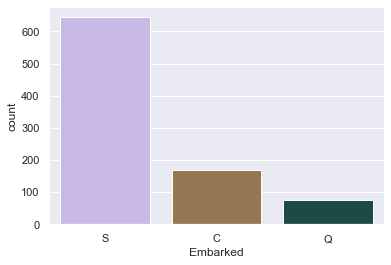

In [7]:
sys.stdout.write(RED)
print('visualization Embarked')
sns.countplot(x='Embarked',data=titanic_df,palette='cubehelix_r')
plt.show()

2.3 Final Adjustments to Data (Train & Test) ¶
Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

If "Age" is missing for a given row, I'll impute with 28 (median age).
If "Embark" is missing for a riven row, I'll impute with "S" (the most common boarding port).
I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid

In [8]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_data = titanic_df
#train_data["Age"]=train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
train_data["Age"].fillna(28, inplace=True)
train_data["Embarked"].fillna("S", inplace=True)

In [10]:
train_data.drop('Cabin', axis=1, inplace=True)

In [11]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,C
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,C
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,S
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,S


2.4 FEATURE - ENGINEERING : Additional Variables 
According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), we will combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [12]:
## Create categorical variable for traveling alone
train_data['TravelBuds']=train_data["SibSp"]+train_data["Parch"]
train_data['TravelAlone']=np.where(train_data['TravelBuds']>0, 0, 1) # 
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.drop('TravelBuds', axis=1, inplace=True)

In [13]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,S,0


In [14]:
#create categorical variable for Pclass || ONE HOT ENCODING
train2 = pd.get_dummies(train_data, columns=["Pclass"])

In [15]:
train2.head(1)

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,S,0,0,0,1


In [16]:
train3 = pd.get_dummies(train2, columns=["Embarked"])

In [17]:
train3.head(1)

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,0,0,0,1,0,0,1


In [18]:
train4=pd.get_dummies(train3, columns=["Sex"])

In [19]:
train4.head(1)

,PassengerId,Survived,Name,Age,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.25,0,0,0,1,0,0,1,0,1


In [20]:
train4.drop('Sex_female', axis=1, inplace=True)
#Drop Unwanted
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)
train4.head(5)
df_final = train4

In [21]:
df_final.head(2)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0


In [22]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
# Apply the same changes to the test data.

#test_df["Age"]=test_df["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)
#test_df["Embarked"]=test_df["Embarked"].fillna("S", inplace=True)

test_df["Age"].fillna(28, inplace=True)
test_df["Fare"].fillna(14.45, inplace=True) ##
test_df.drop('Cabin', axis=1, inplace=True)
test_df['TravelBuds']=test_df["SibSp"]+test_df["Parch"]
test_df['TravelAlone']=np.where(test_df['TravelBuds']>0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('TravelBuds', axis=1, inplace=True)

test2 = pd.get_dummies(test_df, columns=["Pclass"])
test3 = pd.get_dummies(test2, columns=["Embarked"])

test4=pd.get_dummies(test3, columns=["Sex"])
test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

In [24]:
final_test.head(5)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


3. Exploratory Data Analysis

Density Plot of Age for Surviving Population and Deceased Population


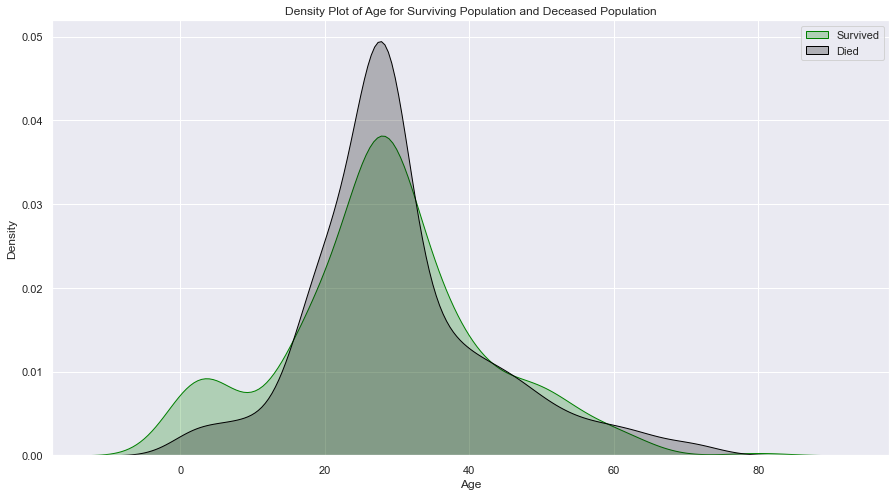

In [25]:
sys.stdout.write(RED)
print("Density Plot of Age for Surviving Population and Deceased Population")
plt.figure(figsize=(15,8))
sns.kdeplot(titanic_df["Age"][df_final.Survived == 1], color="green", shade=True)
sns.kdeplot(titanic_df["Age"][df_final.Survived == 0], color="black", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

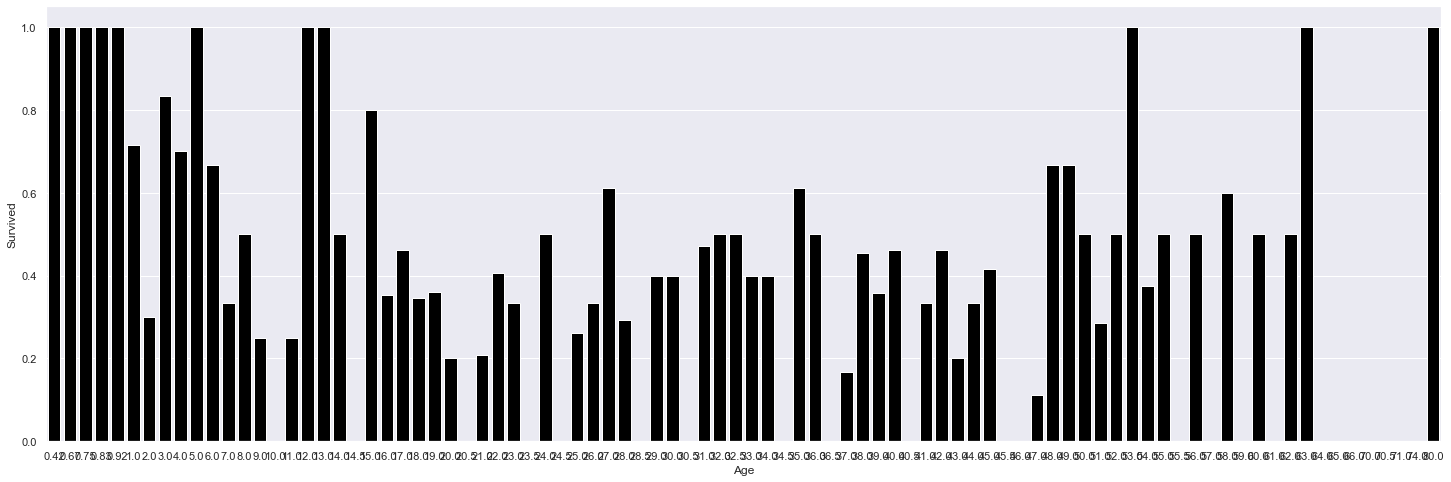

In [26]:
plt.figure(figsize=(25,8))
avg_survival_byage = df_final[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="black")

Considering the survival rate of passengers under 16
-> include new CATEGORICAL variable in dataset: "Minor"

In [27]:
df_final['IsMinor']=np.where(train_data['Age']<=16, 1, 0)
final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

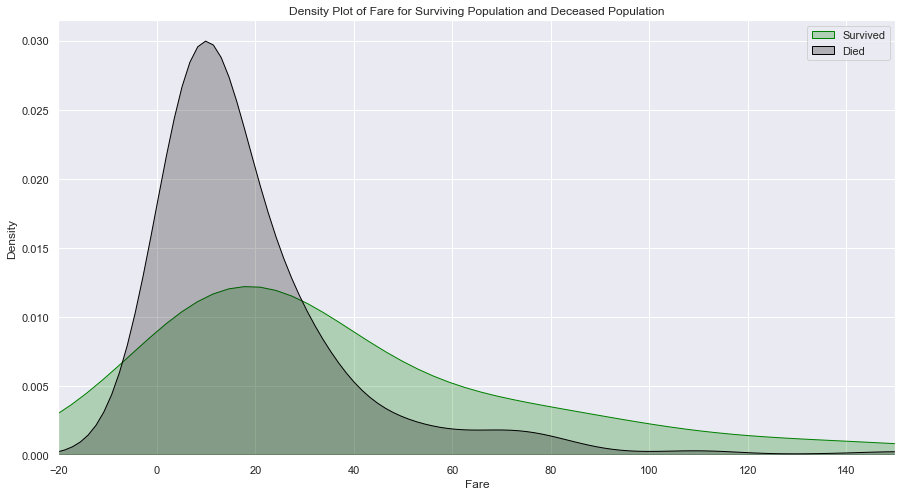

In [28]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 1], color='green', shade=True)
sns.kdeplot(df_final["Fare"][titanic_df.Survived == 0], color='black', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,150)
plt.show()

3.3 Exploration of Passenger Class

C:\Users\utilisateur\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


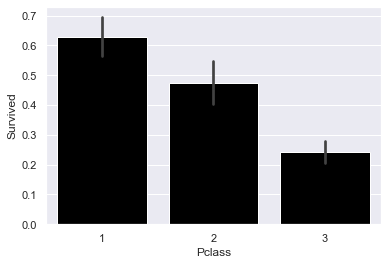

In [29]:
sns.barplot('Pclass', 'Survived', data=titanic_df, color="black")
plt.show()

3.4 Exploration of Embarked Port

C:\Users\utilisateur\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


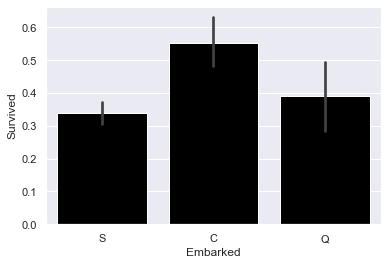

In [30]:
sns.barplot('Embarked', 'Survived', data=titanic_df, color="black")
plt.show()

In [31]:
# 3.5 Exploration of Traveling Alone vs. With Family

C:\Users\utilisateur\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


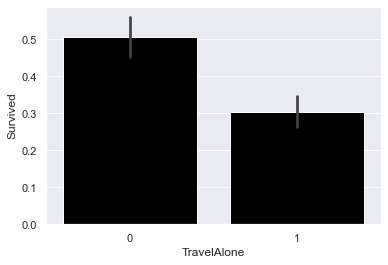

In [32]:
sns.barplot('TravelAlone', 'Survived', data=df_final, color="black")
plt.show()

4 - Modelisation

In [33]:
df_final.head(1)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.25,0,0,0,1,0,0,1,1,0


In [34]:
final_test.head(1)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,34.5,7.8292,1,0,0,1,0,1,0,1,0


In [35]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_Q","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

In [36]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
sys.stdout.write(RED)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.446326
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                  0.3298
Time:                        16:13:11   Log-Likelihood:                -397.68
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.820e-79
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0244      0.009     -2.677      0.007      -0.042      -0.007
Fare            0.0006    

Nearly all variables are significant at the 0.05 alpha level, EXCEPT Fare and TravelAlone (removed one at a time)

In [37]:
cols_sel=["Age", "Pclass_1", "Pclass_2","Embarked_C", "Embarked_Q","Embarked_S","Sex_male","IsMinor"]  
X_2=df_final[cols_sel]
Y=df_final['Survived']

logit_model=sm.Logit(Y,X_2)
result=logit_model.fit()
sys.stdout.write(RED)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.446679
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                  0.3292
Time:                        16:13:11   Log-Likelihood:                -397.99
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.384e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0245      0.009     -2.696      0.007      -0.042      -0.007
Pclass_1       2.2649      0.

In [38]:
cols_sel2=["Age", "Pclass_1", "Pclass_2","Embarked_C", "Embarked_Q","Embarked_S","Sex_male"]  
X_3=df_final[cols_sel2]
Y=df_final['Survived']

logit_model=sm.Logit(Y,X_3)
result=logit_model.fit()
sys.stdout.write(RED)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448000
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Aug 2021   Pseudo R-squ.:                  0.3272
Time:                        16:13:11   Log-Likelihood:                -399.17
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.066e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0329      0.007     -4.428      0.000      -0.047      -0.018
Pclass_1       2.2926      0.

In [39]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_3, Y)

print("Model Accuracy : {:.2f}%".format(logreg.score(X_3, Y)*100))

Model Accuracy : 79.12%


C:\Users\utilisateur\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.25)

In [41]:
cols_sel2=["Age", "Pclass_1", "Pclass_2","Embarked_C", "Embarked_Q","Embarked_S","Sex_male"] 
X3=train[cols_sel2]
Y3=train['Survived']
logit_model3=sm.Logit(Y3,X3)

In [42]:
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
sys.stdout.write(GREEN)
print("Model Accuracy : {:.2f}%".format(logreg.score(X3, Y3)*100))

Model Accuracy : 78.74%


In [43]:
# ENTRAINEMENT SUR DONNEES DE TEST POUR COMPARER
from sklearn import metrics
logreg.fit(X3, Y3)

X3_test = test[cols_sel2]
Y3_test = test['Survived']

Y3test_pred = logreg.predict(X3_test)
sys.stdout.write(GREEN)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)*100))

Accuracy of logistic regression classifier on test set: 81.17


4.4 Out-of-sample Assessment
Assessing the model's performance based on Cross Validation ROC/AUC

In [44]:
# Model's in sample AUC

from sklearn.metrics import roc_auc_score
logreg.fit(X3, Y3)
Y3_pred = logreg.predict(X3)

y_true = Y3
y_scores = Y3_pred
sys.stdout.write(GREEN)
print("Model ROC_AUC : {:.2f}%".format(roc_auc_score(y_true, y_scores)))

Model ROC_AUC : 0.78%


ROC AUC: 0.847


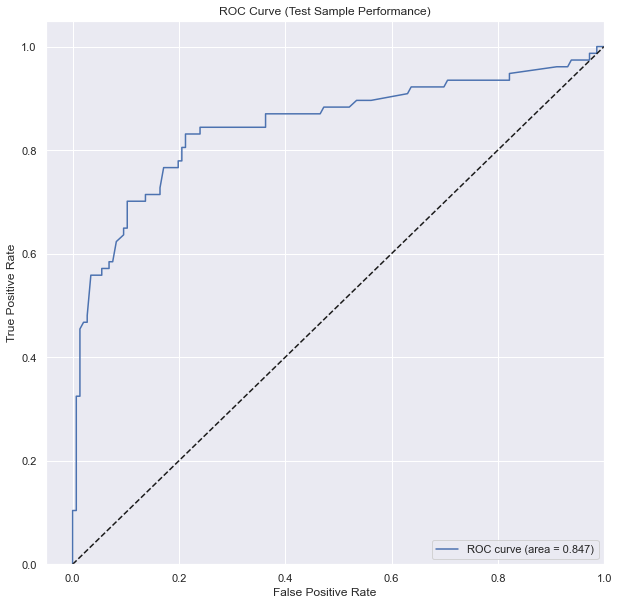

In [45]:
#Visualizing the model's ROC curve (**source for graph code given below the plot)
from sklearn.metrics import roc_curve, auc
logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
 
# Calculate the AUC
sys.stdout.write(GREEN)
roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

An AUC score of 0.5 is effectively as good as the flip of a coin, and means that the model really has no classification power at all between the positive and negative occurences. The AUC for both the test and train samples when run on my logistic regression demonstrates relatively strong power of separation between positive and negative occurences (survived - 1, died - 0).

5 - Suite Modélisation

Random forests, a tree-based machine learning technique, often provide more accurate results than Logistic Regression classifier models. With respect to tree growth, performance tends to taper off after a certain number of trees are grown.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [46]:
from sklearn.ensemble import RandomForestClassifier

cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_Q","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
sys.stdout.write(GREEN)
print ('ROC AUC: %0.3f' % random_forest.score(X, Y) )

ROC AUC: 0.980


In [47]:
final_test_RF=final_test[cols]
Y_pred_RF = random_forest.predict(final_test_RF)

In [48]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_RF
    })
submission.to_csv('titanic_RF.csv', index=False)

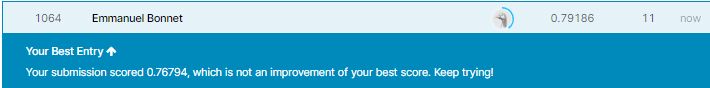

In [49]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [50]:
import graphviz

In [51]:
from sklearn import tree
import graphviz
tree1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best',max_depth=3, min_samples_leaf=20)

In [52]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_Q","Embarked_S","Sex_male","IsMinor"] 
X_DT=df_final[cols]
Y_DT=df_final['Survived']

tree1.fit(X_DT, Y_DT)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

import graphviz 
tree1_view = tree.export_graphviz(tree1, out_file=None, feature_names = X_DT.columns.values, rotate=True) 
tree1viz = graphviz.Source(tree1_view)
tree1viz

In [54]:
final_test_DT=final_test[cols]
Y_pred_DT = tree1.predict(final_test_DT)

In [ ]:
submission = pd.DataFrame({
       "PassengerId": test_df["PassengerId"],
       "Survived": Y_pred_DT
   })
submission.to_csv('titanic_DT.csv', index=False)

7. Ensemble 
Ensemble Learning is a process using which multiple machine learning models (such as classifiers) are strategically constructed to solve a particular problem.

Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), bias (boosting), or improve predictions (stacking).

In [55]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_RF* 0.8 + Y_pred_DT*0.2 #ensmeble of two models
    })
submission.to_csv('titanic_ensemble.csv', index=False)

In [ ]:
# invalid submision

8. TOP 1% Solution Genetic Algorithm

In [56]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [57]:
from sympy import simplify, cos, sin, Symbol, Function, tanh, pprint, init_printing, exp
from sympy.functions import Min,Max

In [71]:
# the winner variables with former values after the hashtag
A = 0.058823499828577    
B = 0.841127 # 0.885868
C = 0.138462007045746 
D = 0.31830988618379069
E = 2.810815 # 2.675679922103882 
F = 0.63661977236758138
G = 5.428569793701172   
H = 3.1415926535897931
I = 0.592158 #0.623655974864960
J = 4.869778 #  2.770736 # 2.212120056152344
K = 0.063467 # 1.5707963267948966
L = -0.091481 # 0.094339601695538 
M = 0.0821533 
N = 0.720430016517639
O = 0.230145 
P = 9.89287 
Q = 785 
R = 1.07241 
S = 281
T = 734
U = 5.3
V = 67.0
W = 2.484848
X = 8.48635 
Y = 63
Z = 12.6275 
AA = 0.735354 # 0.7
AB = 727
AC = 2.5
AD = 2.6 
AE = 0.3
AF = 3.0
AG = 0.226263 #0.1
AH = 2.0
AI = 12.4148
AJ = 96
AK = 0.130303 # 0.2
AL = 176
AM = 3.2
BIG = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM]

In [58]:
def GeneticFunction(data,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM):
    return ((np.minimum( ((((A + data["Sex"]) - np.cos((data["Pclass"] / AH))) * AH)),  ((B))) * AH) +
            np.maximum( ((data["SibSp"] - AC)),  ( -(np.minimum( (data["Sex"]),  (np.sin(data["Parch"]))) * data["Pclass"]))) +
            (AG * ((np.minimum( (data["Sex"]),  (((data["Parch"] / AH) / AH))) * data["Age"]) - data["Cabin"])) +
            np.minimum( ((np.sin((data["Parch"] * ((data["Fare"] - AA) * AH))) * AH)),  ((data["SibSp"] / AH))) +
            np.maximum( (np.minimum( ( -np.cos(data["Embarked"])),  (C))),  (np.sin(((data["Cabin"] - data["Fare"]) * AH)))) +
            -np.minimum( ((((data["Age"] * data["Parch"]) * data["Embarked"]) + data["Parch"])),  (np.sin(data["Pclass"]))) +
            np.minimum( (data["Sex"]),  ((np.sin( -(data["Fare"] * np.cos((data["Fare"] * W)))) / AH))) +
            np.minimum( ((O)),  (np.sin(np.minimum( (((V / AH) * np.sin(data["Fare"]))),  (D))))) +
            np.sin((np.sin(data["Cabin"]) * (np.sin((Z)) * np.maximum( (data["Age"]),  (data["Fare"]))))) +
            np.sin(((np.minimum( (data["Fare"]),  ((data["Cabin"] * data["Embarked"]))) / AH) *  -data["Fare"])) +
            np.minimum( (((AD * data["SibSp"]) * np.sin(((AJ) * np.sin(data["Cabin"]))))),  (data["Parch"])) +
            np.sin(np.sin((np.maximum( (np.minimum( (data["Age"]),  (data["Cabin"]))),  ((data["Fare"] * AK))) * data["Cabin"]))) +
            np.maximum( (np.sin(((AI) * (data["Age"] / AH)))),  (np.sin((-AF * data["Cabin"])))) +
            (np.minimum( (np.sin((((np.sin(((data["Fare"] * AH) * AH)) * AH) * AH) * AH))),  (data["SibSp"])) / AH) +
            ((data["Sex"] - data["SibSp"]) * (np.cos(((data["Embarked"] - AA) + data["Age"])) / AH)) +
            ((np.sin(data["Cabin"]) / AH) - (np.cos(np.minimum( (data["Age"]),  (data["Embarked"]))) * np.sin(data["Embarked"]))) +
            np.minimum( (AE),  ((data["Sex"] * (J * (N - np.sin((data["Age"] * AH))))))) +
            (np.minimum( (np.cos(data["Fare"])),  (np.maximum( (np.sin(data["Age"])),  (data["Parch"])))) * np.cos((data["Fare"] / AH))) +
            np.sin((data["Parch"] * np.minimum( ((data["Age"] - K)),  ((np.cos((data["Pclass"] * AH)) / AH))))) +
            (data["Parch"] * (np.sin(((data["Fare"] * (I * data["Age"])) * AH)) / AH)) +
            (D * np.cos(np.maximum( ((0.5 * data["Fare"])),  ((np.sin(N) * data["Age"]))))) +
            (np.minimum( ((data["SibSp"] / AH)),  (np.sin(((data["Pclass"] - data["Fare"]) * data["SibSp"])))) * data["SibSp"]) +
            np.tanh((data["Sex"] * np.sin((U * np.sin((data["Cabin"] * np.cos(data["Fare"]))))))) +
            (np.minimum( (data["Parch"]),  (data["Sex"])) * np.cos(np.maximum( ((np.cos(data["Parch"]) + data["Age"])),  (AM)))) +
            (np.minimum( (np.tanh(((data["Cabin"] / AH) + data["Parch"]))),  ((data["Sex"] + np.cos(data["Age"])))) / AH) +
            (np.sin((np.sin(data["Sex"]) * (np.sin((data["Age"] * data["Pclass"])) * data["Pclass"]))) / AH) +
            (data["Sex"] * (np.cos(((data["Sex"] + data["Fare"]) * ((X) * (Y)))) / AH)) +
            np.minimum( (data["Sex"]),  ((np.cos((data["Age"] * np.tanh(np.sin(np.cos(data["Fare"]))))) / AH))) +
            (np.tanh(np.tanh( -np.cos((np.maximum( (np.cos(data["Fare"])),  (L)) * data["Age"])))) / AH) +
            (np.tanh(np.cos((np.cos(data["Age"]) + (data["Age"] + np.minimum( (data["Fare"]),  (data["Age"])))))) / AH) +
            (np.tanh(np.cos((data["Age"] * ((-AH + np.sin(data["SibSp"])) + data["Fare"])))) / AH) +
            (np.minimum( (((S) - data["Fare"])),  (np.sin((np.maximum( ((AL)),  (data["Fare"])) * data["SibSp"])))) * AH) +
            np.sin(((np.maximum( (data["Embarked"]),  (data["Age"])) * AH) * (((Q) * H) * data["Age"]))) +
            np.minimum( (data["Sex"]),  (np.sin( -(np.minimum( ((data["Cabin"] / AH)),  (data["SibSp"])) * (data["Fare"] / AH))))) +
            np.sin(np.sin((data["Cabin"] * (data["Embarked"] + (np.tanh( -data["Age"]) + data["Fare"]))))) +
            (np.cos(np.cos(data["Fare"])) * (np.sin((data["Embarked"] - ((T) * data["Fare"]))) / AH)) +
            ((np.minimum( (data["SibSp"]),  (np.cos(data["Fare"]))) * np.cos(data["SibSp"])) * np.sin((data["Age"] / AH))) +
            (np.sin((np.sin((data["SibSp"] * np.cos((data["Fare"] * AH)))) + (data["Cabin"] * AH))) / AH) +
            (((data["Sex"] * data["SibSp"]) * np.sin(np.sin( -(data["Fare"] * data["Cabin"])))) * AH) +
            (np.sin((data["SibSp"] * ((((G + V) * AH) / AH) * data["Age"]))) / AH) +
            (data["Pclass"] * (np.sin(((data["Embarked"] * data["Cabin"]) * (data["Age"] - (R)))) / AH)) +
            (np.cos((((( -data["SibSp"] + data["Age"]) + data["Parch"]) * data["Embarked"]) / AH)) / AH) +
            (D * np.sin(((data["Age"] * ((data["Embarked"] * np.sin(data["Fare"])) * AH)) * AH))) +
            ((np.minimum( ((data["Age"] * A)),  (data["Sex"])) - F) * np.tanh(np.sin(data["Pclass"]))) +
            -np.minimum( ((np.cos(((AB) * ((data["Fare"] + data["Parch"]) * AH))) / AH)),  (data["Fare"])) +
            (np.minimum( (np.cos(data["Fare"])),  (data["SibSp"])) * np.minimum( (np.sin(data["Parch"])),  (np.cos((data["Embarked"] * AH))))) +
            (np.minimum( (((data["Fare"] / AH) - E)),  (C)) * np.sin((K * data["Age"]))) +
            np.minimum( ((M)),  (((np.sin(data["Fare"]) + data["Embarked"]) - np.cos((data["Age"] * (P)))))))

In [ ]:
# Now may I present: The winning gen function, Inspired by Akshat's notebook:
# https://www.kaggle.com/akshat113/titanic-dataset-analysis-level-2

In [65]:
def MungeData(data):
    # Sex
    data.drop(['Ticket', 'Name'], inplace=True, axis=1)
    data.Sex.fillna('0', inplace=True)
    data.loc[data.Sex != 'male', 'Sex'] = 0
    data.loc[data.Sex == 'male', 'Sex'] = 1
    # Cabin
    data.Cabin.fillna('0', inplace=True)
    data.loc[data.Cabin.str[0] == 'A', 'Cabin'] = 1
    data.loc[data.Cabin.str[0] == 'B', 'Cabin'] = 2
    data.loc[data.Cabin.str[0] == 'C', 'Cabin'] = 3
    data.loc[data.Cabin.str[0] == 'D', 'Cabin'] = 4
    data.loc[data.Cabin.str[0] == 'E', 'Cabin'] = 5
    data.loc[data.Cabin.str[0] == 'F', 'Cabin'] = 6
    data.loc[data.Cabin.str[0] == 'G', 'Cabin'] = 7
    data.loc[data.Cabin.str[0] == 'T', 'Cabin'] = 8
    # Embarked
    data.loc[data.Embarked == 'C', 'Embarked'] = 1
    data.loc[data.Embarked == 'Q', 'Embarked'] = 2
    data.loc[data.Embarked == 'S', 'Embarked'] = 3
    data.Embarked.fillna(0, inplace=True)
    data.fillna(-1, inplace=True)
    return data.astype(float)

In [68]:
# This function rounds values to either 1 or 0, because the GeneticFunction returns floats and no definite values
def Outputs(data):
    return np.round(1.-(1./(1.+np.exp(-data))))

if __name__ == "__main__":
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    mungedtrain = MungeData(train)
    trainPredictions = Outputs(GeneticFunction(mungedtrain))

    pdtrain = pd.DataFrame({'PassengerId': mungedtrain.PassengerId.astype(int),
                            'Predicted': trainPredictions.astype(int),
                            'Survived': mungedtrain.Survived.astype(int)})
    pdtrain.to_csv('gptrain.csv', index=False)
    mungedtest = MungeData(test)
    testPredictions = Outputs(GeneticFunction(mungedtest))

    pdtest = pd.DataFrame({'PassengerId': mungedtest.PassengerId.astype(int),
                            'Survived': testPredictions.astype(int)})
    pdtest.to_csv('gptest.csv', index=False)

In [72]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')

cleanedTrain = CleanData(raw_train)
cleanedTest = CleanData(raw_test)
# run a check on the Training dataset. See section "Programm your own gen. algorithm" below on how to 
# construct your own genetic algorithm
thisArray = BIG.copy()
testPredictions = Outputs(GeneticFunction(cleanedTrain,thisArray[0],thisArray[1],thisArray[2],thisArray[3],thisArray[4],thisArray[5],thisArray[6],thisArray[7],thisArray[8],thisArray[9],thisArray[10],thisArray[11],thisArray[12],thisArray[13],thisArray[14],thisArray[15],thisArray[16],thisArray[17],thisArray[18],thisArray[19],thisArray[20],thisArray[21],thisArray[22],thisArray[23],thisArray[24],thisArray[25],thisArray[26],thisArray[27],thisArray[28],thisArray[29],thisArray[30],thisArray[31],thisArray[32],thisArray[33],thisArray[34],thisArray[35],thisArray[36],thisArray[37],thisArray[38]))
pdcheck = pd.DataFrame({'Survived': testPredictions.astype(int)})
ret = pdcheck.Survived.where(pdcheck["Survived"].values==cleanedTrain["Survived"].values).notna()
t,f = ret.value_counts()
score = 100/(t+f)*t
print("Training set score: ",score)

Training set score:  92.70482603815937


In [73]:
testPredictions = Outputs(GeneticFunction(cleanedTest,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM))
pdtest = pd.DataFrame({'PassengerId': cleanedTest.PassengerId.astype(int),
                        'Survived': testPredictions.astype(int)})
pdtest.to_csv('submission_GA.csv', index=False)
pdtest.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


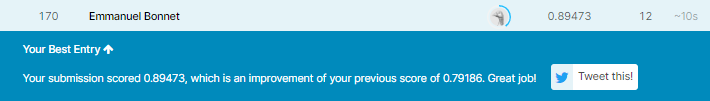